# importing all librarys

In [2]:
from keras.callbacks import History
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,BatchNormalization,GaussianNoise
from tensorflow.keras.layers import MaxPooling2D,ZeroPadding2D
from tensorflow.keras.layers import Flatten,Activation
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers
from keras import backend as K
import numpy as np
from glob import glob
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import auc,roc_curve


C:\Users\RAD365\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# defining batch size,seeds,height and width of the input image

In [18]:
batchsize=32
seed=0
height=90
width=70

# define Image DataGenerator for train,validation,test

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=90)

test_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

# train,validation,test path defining

In [20]:
path_test=r'C:\Users\RAD365\Desktop\snehashis_internship\dataset\us-dataset\originals\predict'
path_train=r'C:\Users\RAD365\Desktop\snehashis_internship\dataset\us-dataset\originals\train'
path_valid=r'C:\Users\RAD365\Desktop\snehashis_internship\dataset\us-dataset\originals\valid'

# creating train,validation,test dataset using flow from directory

In [21]:
train_set = train_datagen.flow_from_directory(path_train,
                                                 target_size=(height,width),color_mode = "grayscale",
                                                 class_mode='binary',
                                                 batch_size=batchsize,seed=seed)
                                            
valid_set = valid_datagen.flow_from_directory(path_valid,
                                            target_size=(height,width),color_mode = "grayscale",
                                            batch_size=batchsize,
                                            class_mode='binary',seed=seed)


test_set = test_datagen.flow_from_directory(path_test,color_mode = "grayscale",
                                            target_size=(height,width),
                                            batch_size=batchsize,
                                            class_mode='binary',seed=seed)

Found 200 images belonging to 2 classes.
Found 94 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


# define sequential model using keras library tensorflow backend

In [22]:
model=Sequential()
model.add(GaussianNoise(0.05))
model.add(Convolution2D(8,kernel_size=(3,3),
                        activation='relu',
                        kernel_regularizer=regularizers.l2(0.0001),
                        input_shape=(height,width,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(8,kernel_size=(3,3),
                        activation='relu',
                        kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32,
                activation='relu',
                kernel_regularizer=regularizers.l2(0.0001)))

model.add(BatchNormalization())
model.add(Dropout(0.8))

model.add(Dense(1,activation='sigmoid'))

# compiling model,define the callbacks early-stopping

In [23]:
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['acc'])
va = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# Printing sequential model

In [24]:
model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002CA87279198>>

# Training model

In [10]:
output=model.fit_generator(train_set,
                           steps_per_epoch =200/batchsize ,
                           epochs = 80,
                           validation_data=valid_set,
                           validation_steps = 94/batchsize)

Epoch 1/80
7/6 [=================================] - 6s 822ms/step - loss: 1.3846 - acc: 0.4720 - val_loss: 0.7351 - val_acc: 0.2766
Epoch 2/80
7/6 [=================================] - 2s 316ms/step - loss: 1.4061 - acc: 0.5396 - val_loss: 0.7380 - val_acc: 0.2766
Epoch 3/80
7/6 [=================================] - 2s 323ms/step - loss: 1.3877 - acc: 0.5290 - val_loss: 0.7397 - val_acc: 0.3511
Epoch 4/80
7/6 [=================================] - 2s 328ms/step - loss: 1.2761 - acc: 0.5478 - val_loss: 0.7423 - val_acc: 0.3191
Epoch 5/80
7/6 [=================================] - 2s 315ms/step - loss: 1.5379 - acc: 0.5558 - val_loss: 0.7401 - val_acc: 0.2447
Epoch 6/80
7/6 [=================================] - 2s 317ms/step - loss: 1.2527 - acc: 0.5038 - val_loss: 0.7357 - val_acc: 0.3191
Epoch 7/80
7/6 [=================================] - 2s 325ms/step - loss: 1.3248 - acc: 0.5600 - val_loss: 0.7326 - val_acc: 0.4362
Epoch 8/80
7/6 [=================================] - 2s 314ms/step - 

7/6 [=================================] - 2s 314ms/step - loss: 1.0933 - acc: 0.6466 - val_loss: 0.4096 - val_acc: 0.9043
Epoch 63/80
7/6 [=================================] - 2s 319ms/step - loss: 0.8198 - acc: 0.6815 - val_loss: 0.4036 - val_acc: 0.9043
Epoch 64/80
7/6 [=================================] - 2s 328ms/step - loss: 0.9679 - acc: 0.6690 - val_loss: 0.3942 - val_acc: 0.9043
Epoch 65/80
7/6 [=================================] - 2s 326ms/step - loss: 1.0749 - acc: 0.6405 - val_loss: 0.3851 - val_acc: 0.9149
Epoch 66/80
7/6 [=================================] - 2s 316ms/step - loss: 0.9760 - acc: 0.6562 - val_loss: 0.3753 - val_acc: 0.9149
Epoch 67/80
7/6 [=================================] - 2s 322ms/step - loss: 0.9536 - acc: 0.6974 - val_loss: 0.3698 - val_acc: 0.9255
Epoch 68/80
7/6 [=================================] - 2s 317ms/step - loss: 1.3967 - acc: 0.5886 - val_loss: 0.3678 - val_acc: 0.9255
Epoch 69/80
7/6 [=================================] - 2s 306ms/step - loss

# ploting accuracy and loss curve of the model

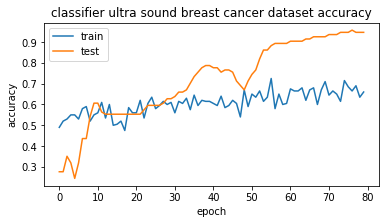

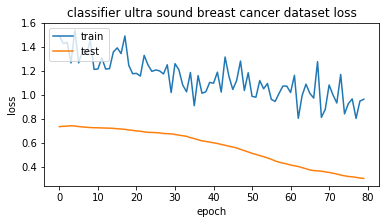

In [11]:
plt.figure(figsize=(6,3))
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('classifier ultra sound breast cancer dataset accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(6,3))
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('classifier ultra sound breast cancer dataset loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evluate the model

In [12]:
test_loss, test_acc=model.evaluate_generator(test_set)

print('test accuracy:'+str(test_acc))
print('test loss: '+str(test_loss))

test accuracy:1.0
test loss: 0.3254849910736084


#  define the y_true values

In [13]:
zeros=np.zeros((10,1))
ones=np.ones((15,1))

y_true=np.concatenate((ones,zeros), axis=0)

# predicting y_hat values of input testing dataset

In [14]:
y_hat=[]
path_test_png=r'C:\Users\RAD365\Desktop\snehashis_internship\dataset\us-dataset\originals\predict\*.bmp'
from keras.preprocessing import image
pngss=glob(path_test_png)
for i in range(len(pngss)):
    test_image = image.load_img(pngss[i] ,target_size= (90,70),color_mode = "grayscale")
    arr = np.array(test_image)
    arr = np.true_divide(arr,[255.0],out=None)


# Changing the input of the size...
    test_image = image.img_to_array(arr)

# Adding a new dimension (the placement of the image in the batchsize)
    test_image = np.expand_dims(test_image, axis=0)

    predic_classes = model.predict_classes(test_image)
    y_hat.append(predic_classes[0])

# ploting confusion matrix

In [15]:
cm=confusion_matrix(y_true,y_hat)
print(cm)

[[10  0]
 [ 0 15]]


# find AUC SCORE,ROC_CURVE

In [16]:
y_true=list(y_true)
y_hat=list(y_hat)

from sklearn.metrics import auc,roc_curve
#classi_report=classification_report(y_true, y_hat)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_true, y_hat)
auc_curve=auc(fpr_keras, tpr_keras)

print('auc score is:'+str(auc_curve))

test_accuracy=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[1,0]+cm[0,1])
print('predict accuracy:'+str(test_accuracy))

auc score is:1.0
predict accuracy:1.0


# ploting ROC CURVE

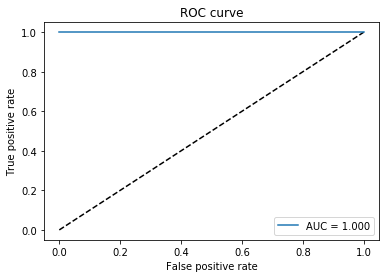

In [17]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC = {:.3f}'.format(auc_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()